# Amino acid features

> Extract features from amino acid

## Setup

In [ ]:
!pip install git+https://github.com/sky1ove/katlas.git -Uqq

In [ ]:
from katlas.core import *
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()
import seaborn as sns

## Rdkit descriptors

In [ ]:
# Download the amino acid info
aa = Data.get_aa_info()

In [ ]:
aa = aa.iloc[:-2,:]

In [ ]:
get_rdkit?

Signature: get_rdkit(df, col='SMILES', normalize=True)
Docstring: Extract ~209 features from smiles via rdkit.Chem.Descriptors; if normalize, apply StandardScaler
File:      /notebooks/katlas/katlas/feature.py
Type:      function


In [ ]:
aa_rdkit = get_rdkit(aa, 'SMILES')

In [ ]:
aa_rdkit.shape

(23, 211)

In [ ]:
aa_rdkit = preprocess(aa_rdkit)

removing columns: {'fr_aldehyde', 'fr_ester', 'NumValenceElectrons', 'Chi0', 'fr_amide', 'SMR_VSA8', 'fr_tetrazole', 'EState_VSA11', 'fr_morpholine', 'LabuteASA', 'fr_piperdine', 'fr_oxazole', 'VSA_EState9', 'fr_halogen', 'fr_nitroso', 'fr_COO', 'fr_ArN', 'fr_term_acetylene', 'fr_furan', 'fr_Ar_NH', 'HeavyAtomMolWt', 'MaxEStateIndex', 'VSA_EState1', 'SlogP_VSA9', 'fr_ether', 'NumSaturatedHeterocycles', 'fr_epoxide', 'fr_sulfone', 'fr_barbitur', 'fr_phenol', 'PEOE_VSA5', 'fr_lactone', 'PEOE_VSA13', 'fr_Ar_COO', 'SlogP_VSA11', 'fr_nitro_arom_nonortho', 'BCUT2D_MRHI', 'fr_azide', 'fr_urea', 'HeavyAtomCount', 'MaxPartialCharge', 'fr_phenol_noOrthoHbond', 'fr_benzodiazepine', 'fr_hdrzine', 'fr_pyridine', 'fr_isocyan', 'fr_alkyl_halide', 'fr_imidazole', 'fr_Al_OH_noTert', 'fr_Ndealkylation1', 'fr_imide', 'fr_nitro', 'fr_Ndealkylation2', 'SlogP_VSA7', 'fr_nitrile', 'fr_thiocyan', 'Chi2n', 'SPS', 'SlogP_VSA10', 'fr_prisulfonamd', 'fr_allylic_oxid', 'fr_thiophene', 'fr_phos_ester', 'fr_dihydrop

In [ ]:
aa_rdkit.shape

(23, 103)

## PCA

In [ ]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

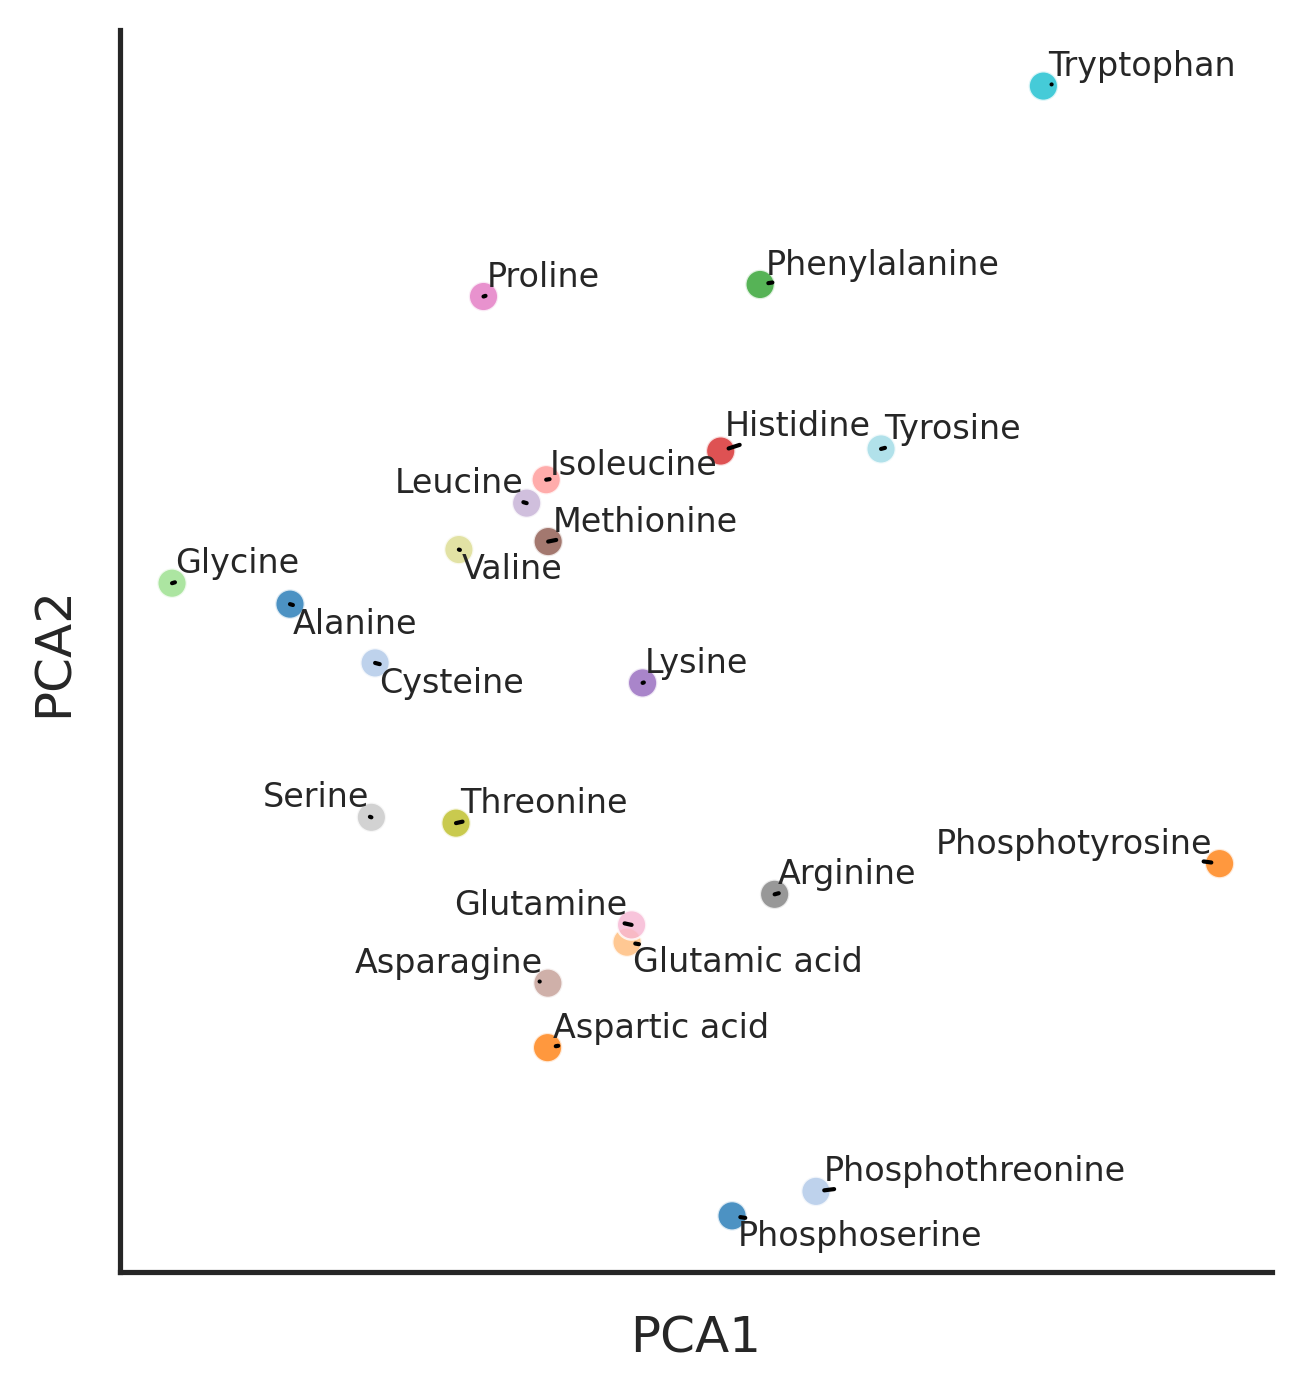

In [ ]:
plot_cluster(aa_rdkit, name_list = aa.Name, hue = 'aa', method = 'pca')

## Correlation of aa

In [ ]:
rdkit_corr = aa_rdkit.T.corr()

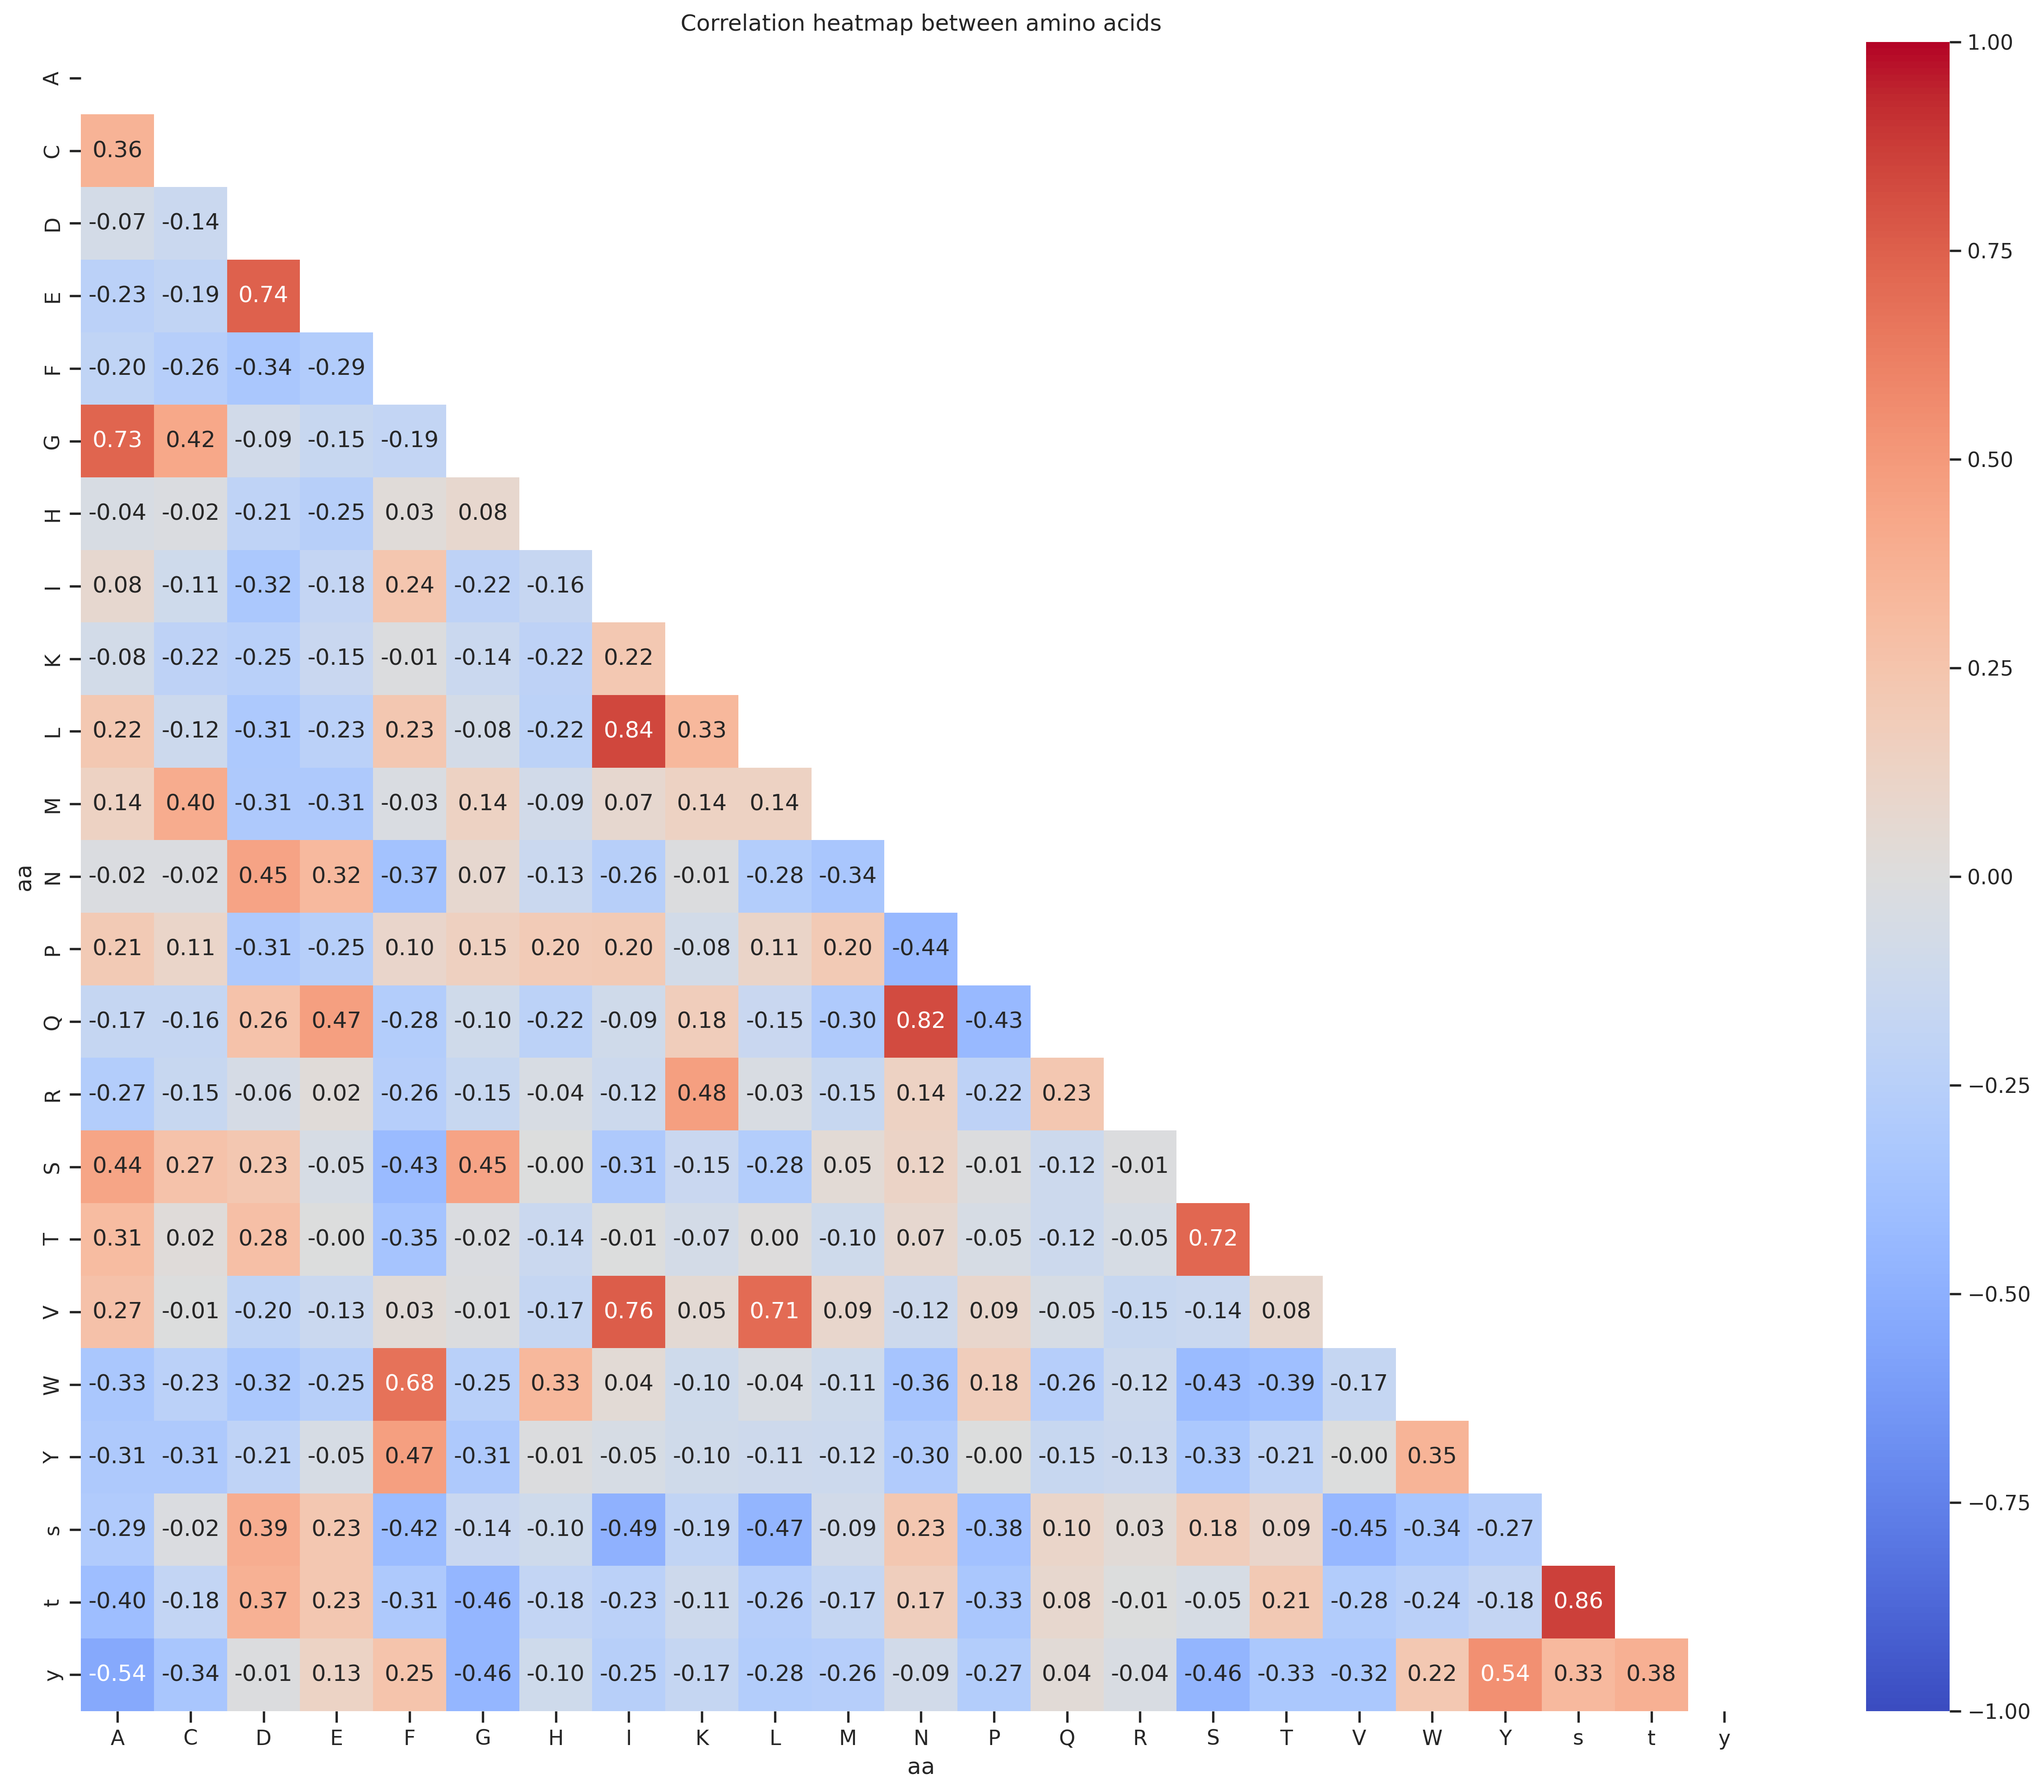

In [ ]:
draw_corr(rdkit_corr)

## Correlation of aa in target

### PSPA

In [ ]:
df = Data.get_pspa().iloc[:,:-3]

In [ ]:
df2 = df.unstack().reset_index()

In [ ]:
df2.columns = ['substrate','kinase','target']

In [ ]:
df2['aa']=df2.substrate.str[-1]

In [ ]:
df2['enum'] = df2.groupby('aa').cumcount()

In [ ]:
df_pivot = df2.pivot(index='enum', columns='aa', values='target')

In [ ]:
corr = df_pivot.corr().round(2)

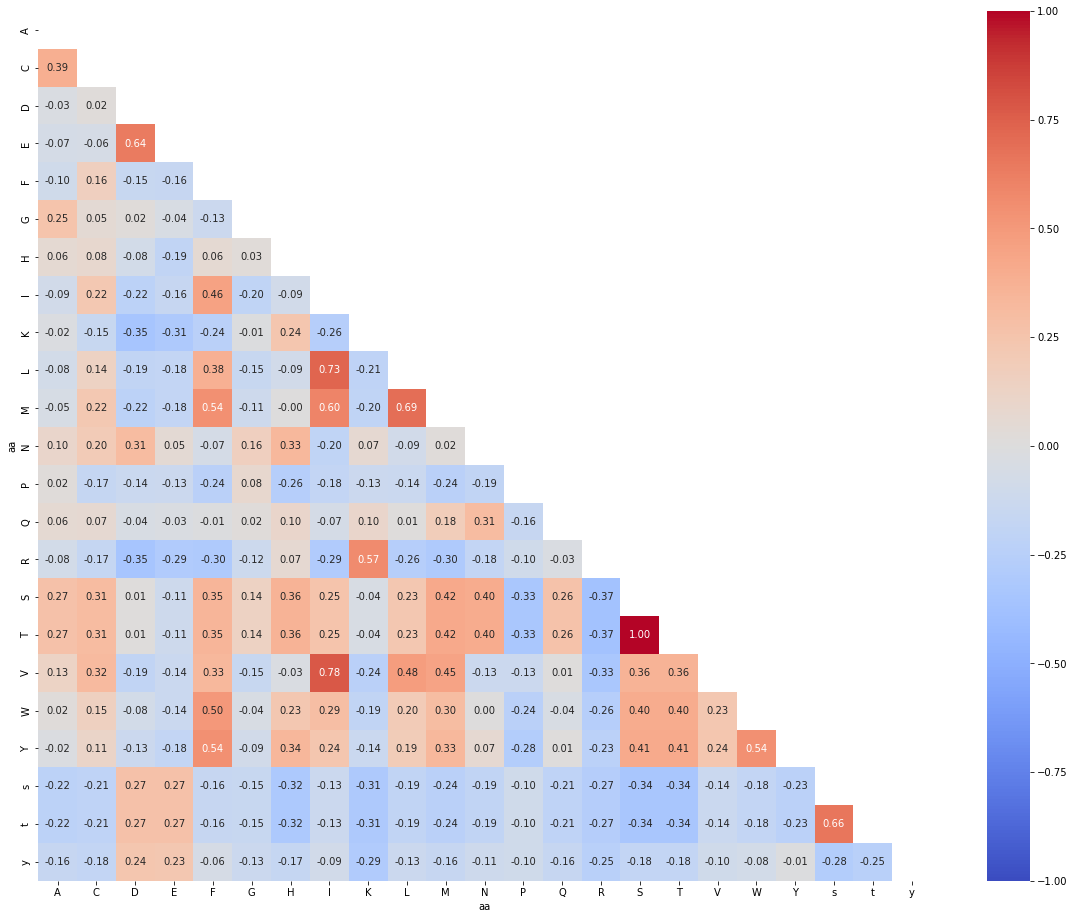

In [ ]:
draw_corr(corr)

### KS

In [ ]:
df = Data.get_ks().iloc[:,:-3]

In [ ]:
df2 = df.unstack().reset_index()

In [ ]:
df2.columns = ['substrate','kinase','target']

In [ ]:
df2['aa']=df2.substrate.str[-1]

In [ ]:
# df2 = pd.read_parquet('train/scaled_t5_aa.parquet')

In [ ]:
df2

,substrate,kinase,target,aa
0,-7P,SRC,0.050985,P
1,-7P,EPHA3,0.038005,P
2,-7P,FES,0.045432,P
3,-7P,NTRK3,0.038080,P
4,-7P,ALK,0.042712,P
...,...,...,...,...
93920,0y,CDK8,0.046729,y
93921,0y,BUB1,0.047170,y
93922,0y,MEKK3,0.067308,y
93923,0y,MAP2K3,0.352941,y


In [ ]:
df2['enum'] = df2.groupby('aa').cumcount()

In [ ]:
df_pivot = df2.pivot(index='enum', columns='aa', values='target')

In [ ]:
corr = df_pivot.corr().round(2)

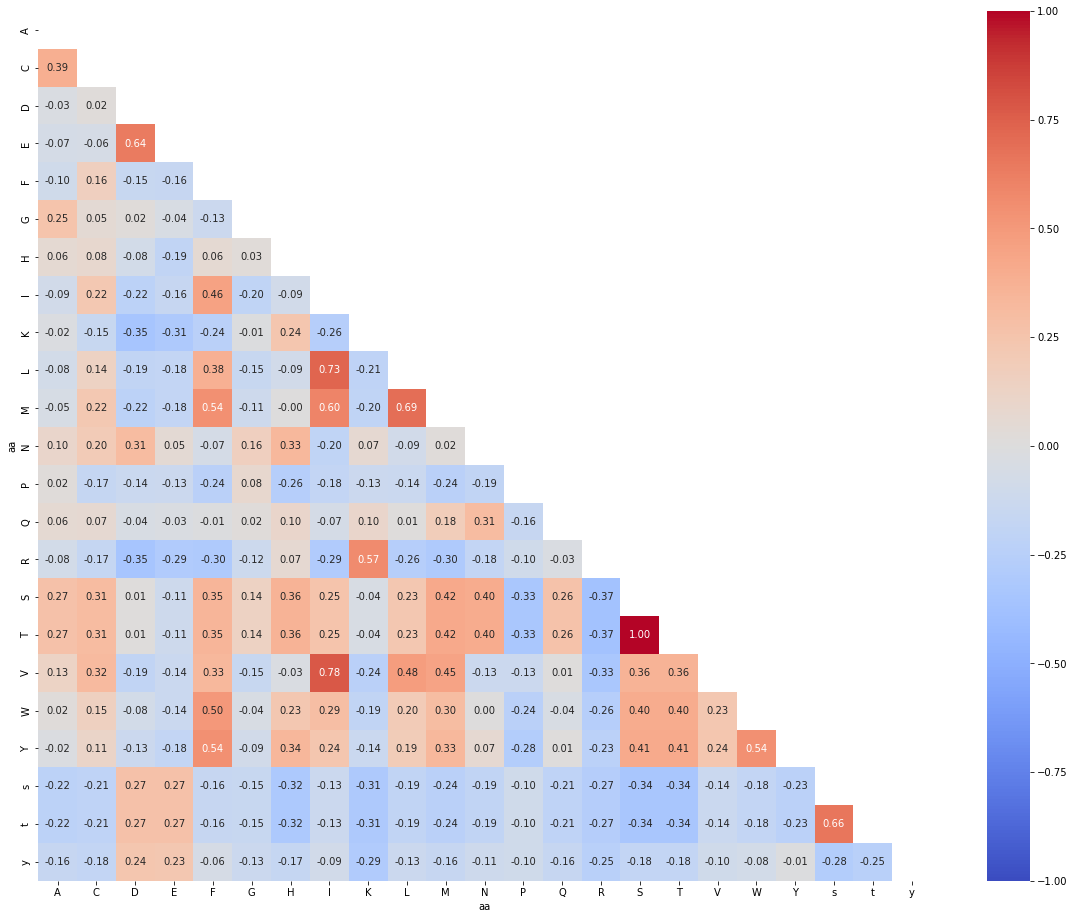

In [ ]:
draw_corr(corr)

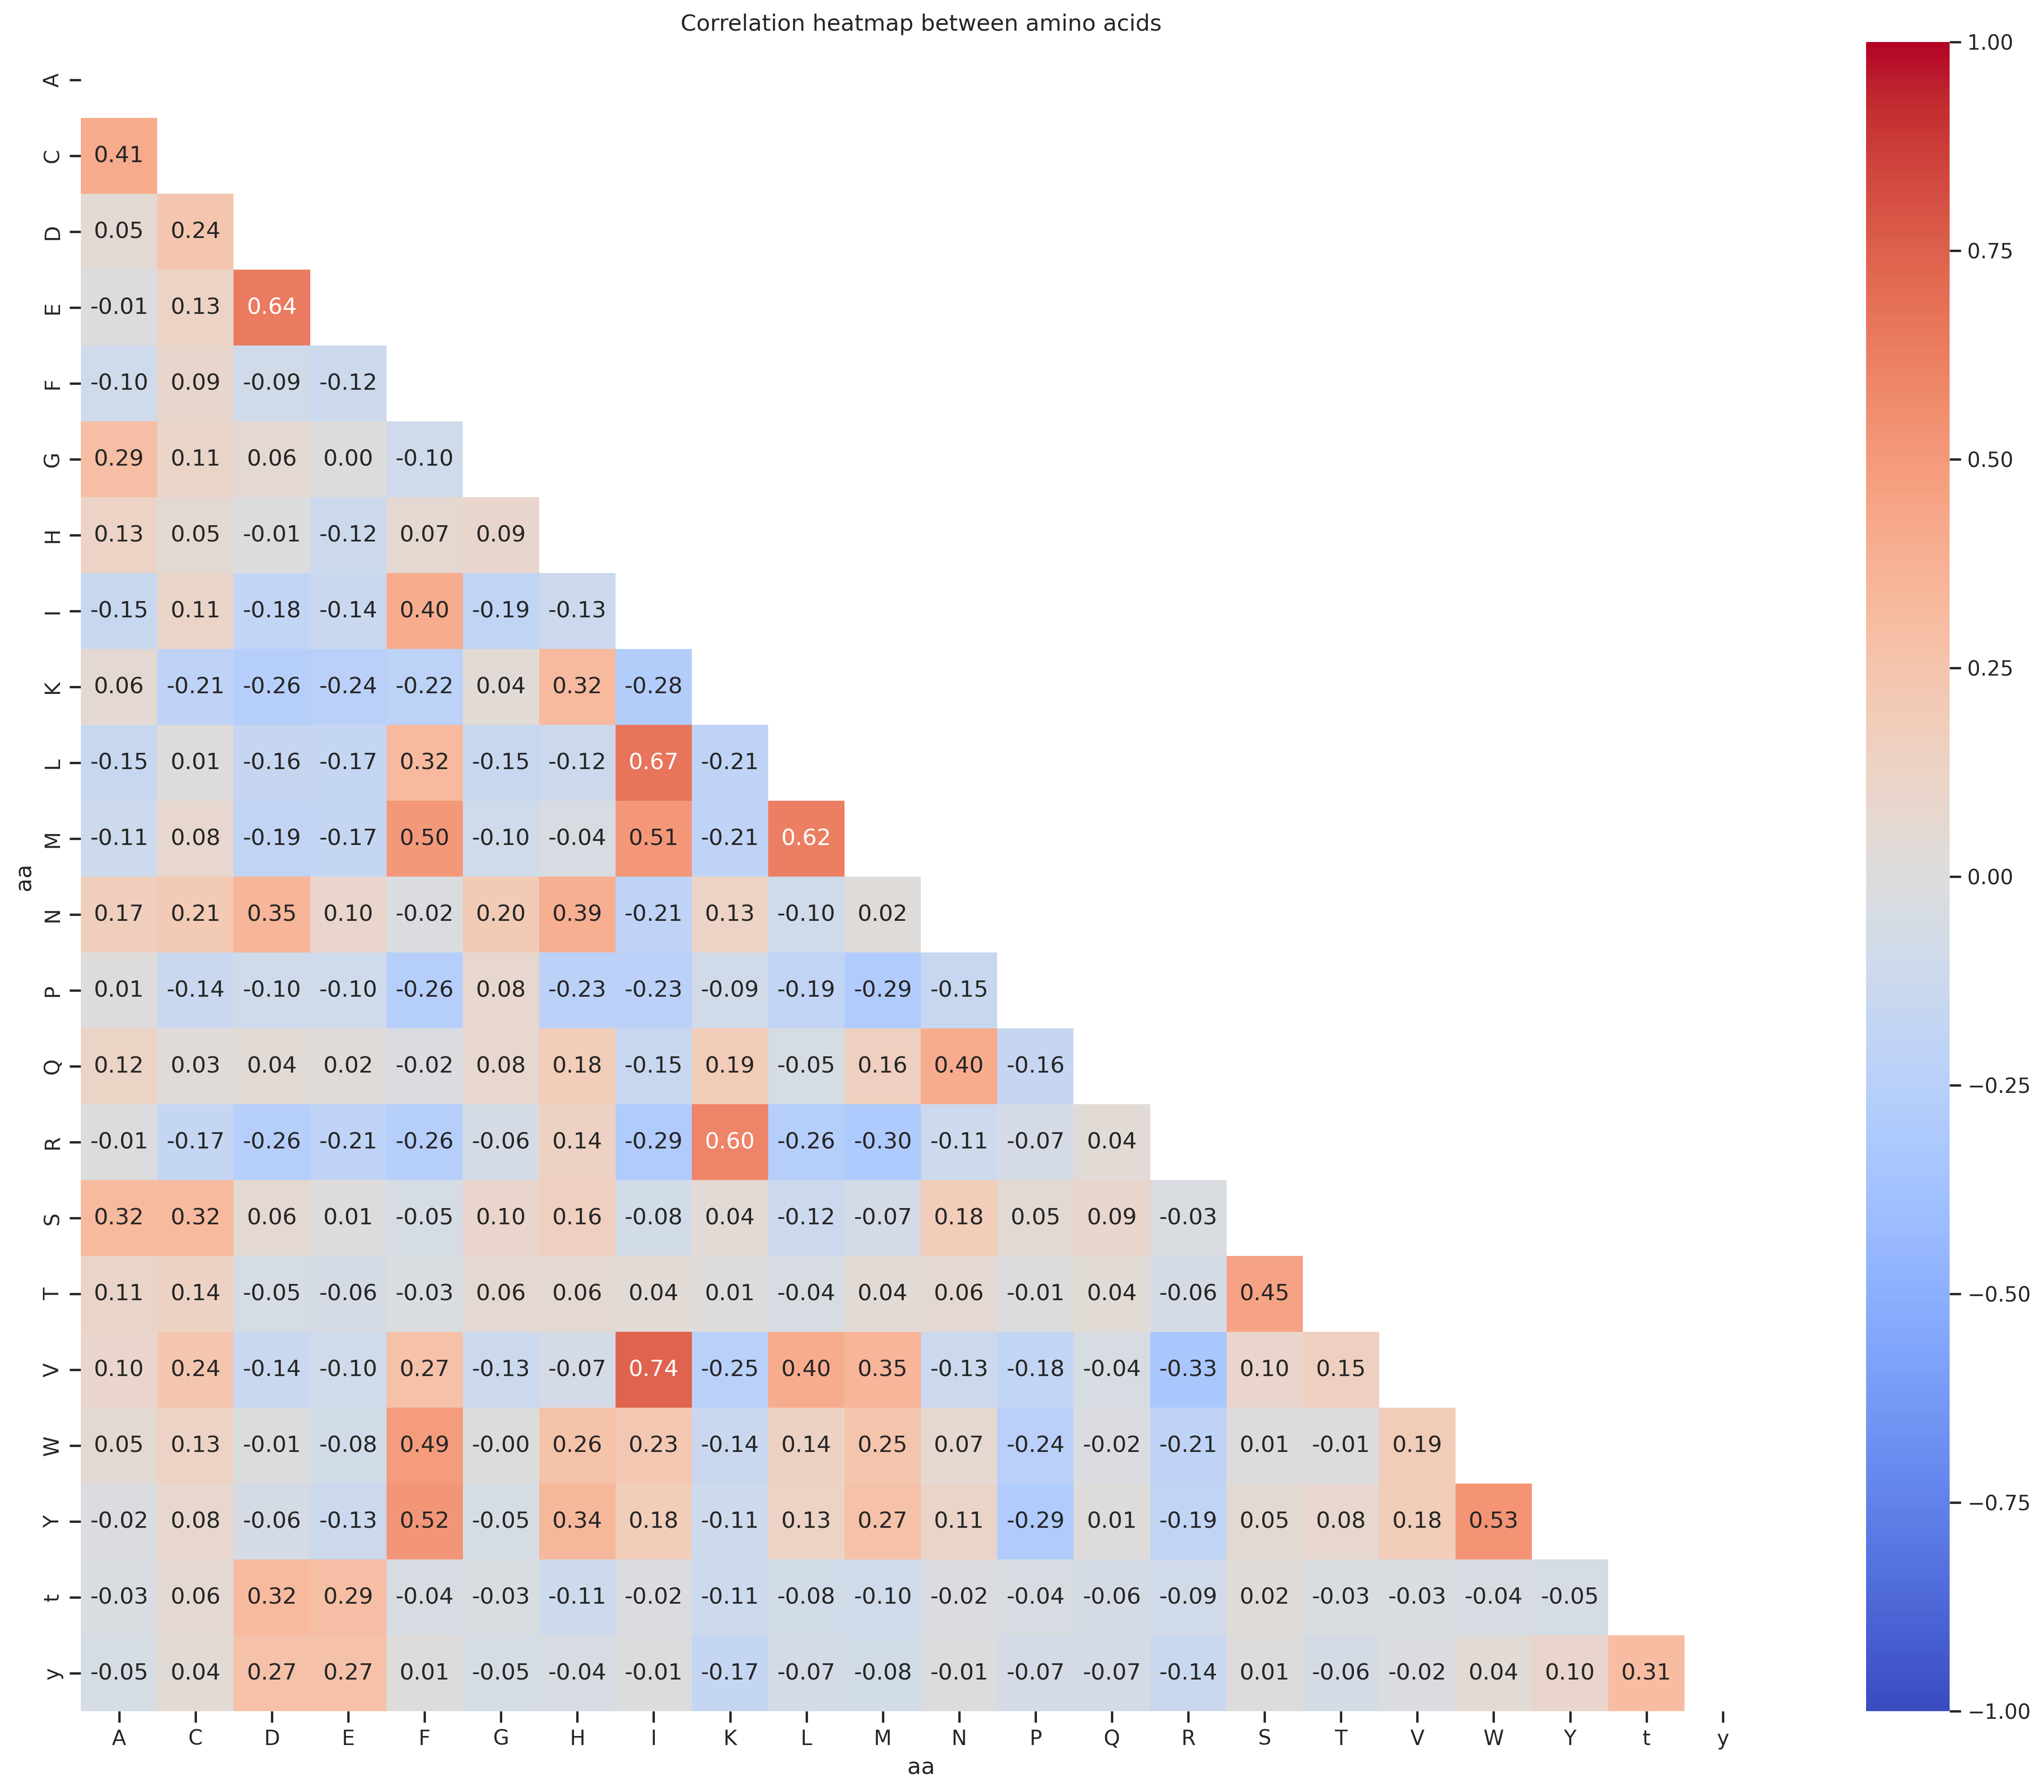

In [ ]:
draw_corr(corr)